In [1]:
import glob
import pandas as pd
import json 
import time

import random

import matplotlib.pyplot as plt
plt.rcdefaults()

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# https://stackoverflow.com/questions/44036971/multiple-outputs-in-keras

# Import Photos from Directory to Json Summary

In [3]:
def Summary(directory):
    data = []
    for file in glob.glob("{}*.jpg".format(directory)):
        # from the file name, determine properties:
        params = file.replace(directory,'').split('_')

        # determine gender
        gender = 'male'
        if params[1] == '1':
            gender = 'female'
        
        # determine ethnicity
        ethnicity = 'white'
        if params[2] == '1':
            ethnicity = 'black'
        if params[2] == '2':
            ethnicity = 'asian'
        if params[2] == '3':
            ethnicity = 'indian'
        if params[2] == '4':
            ethnicity = 'other'
        
        # generate dataframe row 
        data.append({
            'age' : int(params[0]),
            'gender' : gender,
            'ethnicity' : ethnicity,
            'filename' : file
        })
    return pd.DataFrame(data)

In [4]:
# Build Database
start = time.time()
# read images into list 
print('Summary 3...')
directory = 'D:\\Downloads\\Faces\\part3.tar\\part3\\'
summary3 = Summary(directory)

print('Summary 2...')
directory = 'D:\\Downloads\\Faces\\part3.tar\\part2\\'
summary2 = Summary(directory)

print('Summary 1...')
directory = 'D:\\Downloads\\Faces\\part3.tar\\part1\\'
summary1 = Summary(directory)
print('time taken: {} minutes'.format((time.time() - start)/60))

summary = summary1.append(summary2).append(summary3) # merge directories into one list
summary.shape

Summary 3...
Summary 2...
Summary 1...
time taken: 0.0029160102208455403 minutes


(24106, 4)

# Statistics 

In [5]:
df = summary
df.shape

(24106, 4)

In [6]:
# Gender
male = df[df['gender'] == 'male'].shape[0]
female = df[df['gender'] == 'female'].shape[0]

print('male: {}'.format(male))
print('female: {}'.format(female))
print('ratio: {}'.format(male/(female+male)))
# ax = df['gender'].plot.hist(rot=0, bins=20)

male: 12583
female: 11523
ratio: 0.5219862274952294


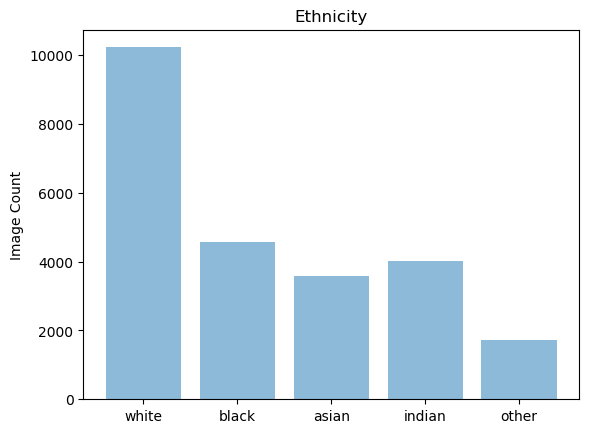

In [7]:
# Ethnicity
white = df[df['ethnicity'] == 'white'].shape[0]
black = df[df['ethnicity'] == 'black'].shape[0]
asian = df[df['ethnicity'] == 'asian'].shape[0]
indian = df[df['ethnicity'] == 'indian'].shape[0]
other = df[df['ethnicity'] == 'other'].shape[0]

# print('white: {}'.format(white))
# print('black: {}'.format(black))
# print('asian: {}'.format(asian))
# print('indian: {}'.format(indian))
# print('other: {}'.format(other))
# ax = df['ethnicity'].plot.hist(rot=0, bins=20)

objects = ('white', 'black', 'asian', 'indian', 'other')
y_pos = np.arange(len(objects))
performance = [white,black,asian,indian,other]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Image Count')
plt.title('Ethnicity')

plt.show()

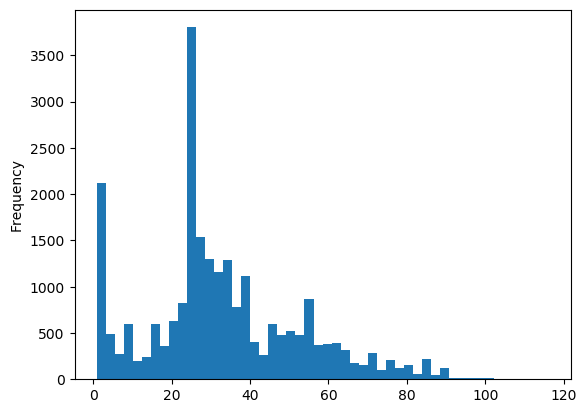

In [8]:
# Age distribution 
ax = df['age'].plot.hist(rot=0, bins=50)

# Re-Sample the data 

In [9]:
"""
After realizing that the model was choosing the most common class rather than learning to recognize features, 
a re-sampling section is added to rebalance the input data 

After doing some research, it seems that while re-sampling can help classification problems, it is not as 
helpful for regression problems.  Also, re-thinking the model,  Age should be a linear rather than categorical variable.   Thus, it is not useful to distort the regressor.  

https://stats.stackexchange.com/questions/30162/sampling-for-imbalanced-data-in-regression

To base sampling off of inputs, should use imblearn after croping faces.   
"""

'\nAfter realizing that the model was choosing the most common class rather than learning to recognize features, \na re-sampling section is added to rebalance the input data \n\nAfter doing some research, it seems that while re-sampling can help classification problems, it is not as \nhelpful for regression problems.  Also, re-thinking the model,  Age should be a linear rather than categorical variable.   Thus, it is not useful to distort the regressor.  \n'

In [ ]:
# remove ages above 80 (optliers), merge into 80+ category 
# close age range? 
# 

In [ ]:
# remove age outliers 
# close age range 
# convert x to list of dict 
# convert 3 outputs to 1 y 

# Oversampling

In [14]:
y = summary['ethnicity'].astype('category').cat.codes.values

In [12]:
X = summary

In [17]:
def code(a,g,e):
    return a * 100 + g * 10 + e

code(158,1,4)

15814

In [24]:
int(-10.8)

-10

In [21]:
def uncode(age):
    e = age % 10
    age = int(age / 10)
    g = age % 10
    age = int(age / 10)
    return age, g, e

In [22]:
uncode(code(158, 1, 5))

(158, 1, 5)

In [ ]:
np.apply_along_axis(abs_sum, 1, arr)

In [15]:
#import pandas as pd
from imblearn.over_sampling import SMOTE
#from sklearn.datasets import load_breast_cancer

#dataset = load_breast_cancer()
#X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
#y = dataset.target

smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_sample(X, y)

X_resampled = pd.DataFrame(X_resampled, columns=X.columns)

ValueError: could not convert string to float: 'female'

# Undersampling

# weighting